# 🎬 TMDb Box Office Prediction - A Machine Learning Case Study

This project embarks on an exciting journey into the realm of **predictive analytics** within the entertainment industry. Our core mission is to develop a sophisticated machine learning model capable of **forecasting the box office revenue of movies** leveraging comprehensive data from The Movie Database (TMDb). In an industry where financial success is paramount, the ability to accurately predict a film's earning potential *before* its release is an invaluable asset for **production studios, distributors, and investors**, enabling strategic resource allocation and risk mitigation.

---

## 🎯 Project Goal

The primary objective of this project is to develop a robust prediction model capable of estimating a movie's worldwide gross revenue *before* its release. This will involve:

* **Exploratory Data Analysis (EDA):** Understanding the characteristics of the movie datasets (e.g., budget, genres, release date, cast, crew).
* **Feature Engineering:** Creating new, meaningful features from raw data to improve model performance.
* **Model Selection & Training:** Experimenting with various machine learning algorithms to find the best fit for our prediction task.
* **Model Evaluation:** Assessing the model's accuracy using appropriate metrics, primarily **Root Mean Squared Error (RMSE)**.

---

## 📚 Datasets

We will be utilizing two primary datasets for this project:

* `train.csv`: This dataset contains historical movie data along with their corresponding actual box office revenues. It will be used to **train** our prediction model.
* `test.csv`: This dataset contains movie data without the revenue information. Our trained model will predict the revenue for these movies, and these predictions will form our submission.

---

## 🛠️ Technologies & Libraries

This project will primarily use Python and its powerful data science libraries, including:

* **Pandas:** For data manipulation and analysis.
* **NumPy:** For numerical operations.
* **Scikit-learn:** For machine learning model implementation and evaluation.
* **Matplotlib & Seaborn:** For data visualization.
* **CatBoost:** A high-performance open-source library for gradient boosting on decision trees, known for its excellent results with heterogeneous data and categorical features.
* **XGBoost:** A highly optimized, distributed, and scalable gradient boosting library.
* **LightGBM:** A fast, distributed, high-performance gradient boosting framework based on decision tree algorithms.

---

## 📊 Evaluation Metric

The performance of our revenue prediction model will be evaluated using the **Root Mean Squared Error (RMSE)**, as detailed in the `RMSE Formula` section. A lower RMSE indicates a more accurate model.

---

## 🚀 Getting Started

To run this project locally, follow these steps:

1.  **Clone this repository:**
    ```bash
    git clone [your_repository_url_here]
    cd [your_repository_name]
    ```
2.  **Install necessary libraries:**
    ```bash
    pip install -r requirements.txt
    ```
3.  **Download the datasets:** (Specify where users can get the datasets, e.g., Kaggle competition page link)
    * `train.csv`
    * `test.csv`
4.  **Run the Jupyter Notebooks:** Open the notebooks in sequence to follow the project workflow.

---

---
## RMSE Formula

The **Root Mean Squared Error (RMSE)** is a key metric used to evaluate the performance of our revenue prediction model in the TMDb Box Office Prediction project. It measures the average magnitude of prediction errors, calculated as:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
$$

Here, $y_i$ represents the **actual revenue**, $\hat{y}_i$ is the **predicted revenue**, and $n$ is the **number of movies** in the test set.

## Import Necessary Libraries
This initial cell is dedicated to importing all the essential Python libraries that will be used throughout the project. These libraries provide the tools needed for data manipulation, numerical operations, visualization, and machine learning tasks. Importing them at the beginning ensures that all required functionalities are readily available for subsequent steps of data loading, preprocessing, model building, and evaluation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import json
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

First off, we're bringing in our main training dataset from `train.csv`. After that, we'll run `.info()` to get a quick summary of what's inside – like checking out the column types and seeing if we have any missing pieces of information. It's our initial peek into the data!

In [3]:
traindf = pd.read_csv('./data/train.csv')
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

Next up, we're doing the same thing for our test dataset, bringing in `test.csv`. We'll run `.info()` here too, just to get a quick overview of its structure and make sure everything looks as expected before we dive deeper.

In [3]:
testdf = pd.read_csv('./data/test.csv')
testdf.info()

FileNotFoundError: [Errno 2] No such file or directory: './data/test.csv'

## Features Description

- Data Description id - Integer unique id of each movie

- belongs_to_collection - Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format. You can see the Poster and Backdrop Image like this: https://image.tmdb.org/t/p/original/. Example: https://image.tmdb.org/t/p/original//iEhb00TGPucF0b4joM1ieyY026U.jpg

- budget:Budget of a movie in dollars. 0 values mean unknown.

- genres : Contains all the Genres Name & TMDB Id in JSON Format

- homepage - Contains the official homepage URL of a movie. Example: http://sonyclassics.com/whiplash/ , this is the homepage of Whiplash movie.

- imdb_id - IMDB id of a movie (string). You can visit the IMDB Page like this: https://www.imdb.com/title/

- original_language - Two digit code of the original language, in which the movie was made. Like: en = English, fr = french.

- original_title - The original title of a movie. Title & Original title may differ, if the original title is not in English.

- overview - Brief description of the movie.

- popularity - Popularity of the movie in float.

- poster_path - Poster path of a movie. You can see the full image like this: https://image.tmdb.org/t/p/original/

- production_companies - All production company name and TMDB id in JSON format of a movie.

- production_countries - Two digit code and full name of the production company in JSON format.

- release_date - Release date of a movie in mm/dd/yy format.

- runtime - Total runtime of a movie in minutes (Integer).

- spoken_languages - Two digit code and full name of the spoken language.

- status - Is the movie released or rumored?

- tagline - Tagline of a movie

- title - English title of a movie

- Keywords - TMDB Id and name of all the keywords in JSON format.

- cast - All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format

- crew - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.

- revenue - Total revenue earned by a movie in dollars.

## EDA
---
**Diving into Exploratory Data Analysis (EDA)**

Alright, with our datasets loaded, it's time to kick off the **Exploratory Data Analysis (EDA)** phase! This is where we get to know our data intimately. Think of it as detective work: we'll be sifting through the raw information to uncover patterns, identify anomalies, and understand the relationships between different features and our target variable – movie revenue.

### **Why is EDA Crucial for Our Project?**

For our TMDb Box Office Prediction project, a thorough EDA is absolutely vital because it helps us:

* **Understand Data Characteristics:** We'll examine the distributions of numerical features (like `budget`, `runtime`) and the categories within categorical features (genres, production companies).

* **Identify Missing Values:** Pinpointing where data is absent is critical, as missing information can skew our model's performance. We'll decide on strategies to handle these, whether it's imputation or removal.

* **Detect Outliers:** Extreme values can heavily influence our model. We'll look for outliers in `revenue`, `budget`, and other numerical fields to understand their impact and decide how to treat them.

* **Uncover Relationships:** We'll explore how different features correlate with each other and, most importantly, with our `revenue` target. This helps us understand which factors might be the strongest predictors.

* **Prepare for Feature Engineering:** Insights gained from EDA will directly inform our feature engineering efforts, guiding us on how to create new, more informative variables.

* **Validate Assumptions:** We can check if our data meets any assumptions required by certain machine learning models.

In this phase, we'll use various statistical summaries and visualizations to paint a clear picture of our data before we move on to more complex modeling. It's all about building a solid foundation for accurate predictions!

---

let's look more deeply in our data in train file

In [ ]:
traindf.head()

and also test file!

In [ ]:
testdf.head()

Here, we're generating a comprehensive statistical summary of **all columns** in our training data, which helps us quickly grasp their distributions, central tendencies, and variability.

In [ ]:
traindf.describe(include= 'all')

test file too

In [ ]:
testdf.describe(include= 'all')

Here, we're quickly counting up how many **missing (NaN) values** each column in our training DataFrame has. This is a super important step for data cleaning because it tells us exactly where we might need to fill in blanks or adjust our approach.

In [5]:
# Calculate the sum of missing (NaN) values for each column in the 'traindf' DataFrame
# .isna() checks for NaN values and returns a boolean DataFrame (True for NaN, False otherwise)
# .sum() then counts the number of True values (i.e., NaNs) for each column
traindf.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

count of missing values in each column in test dataset too:

In [ ]:
testdf.isna().sum()

plot Budget vs. Revenue and look at distribution of it:

**Budget vs. Revenue**

We're just using a `jointplot` here to quickly see if there's a visual connection between a movie's `budget` and its `revenue`.

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

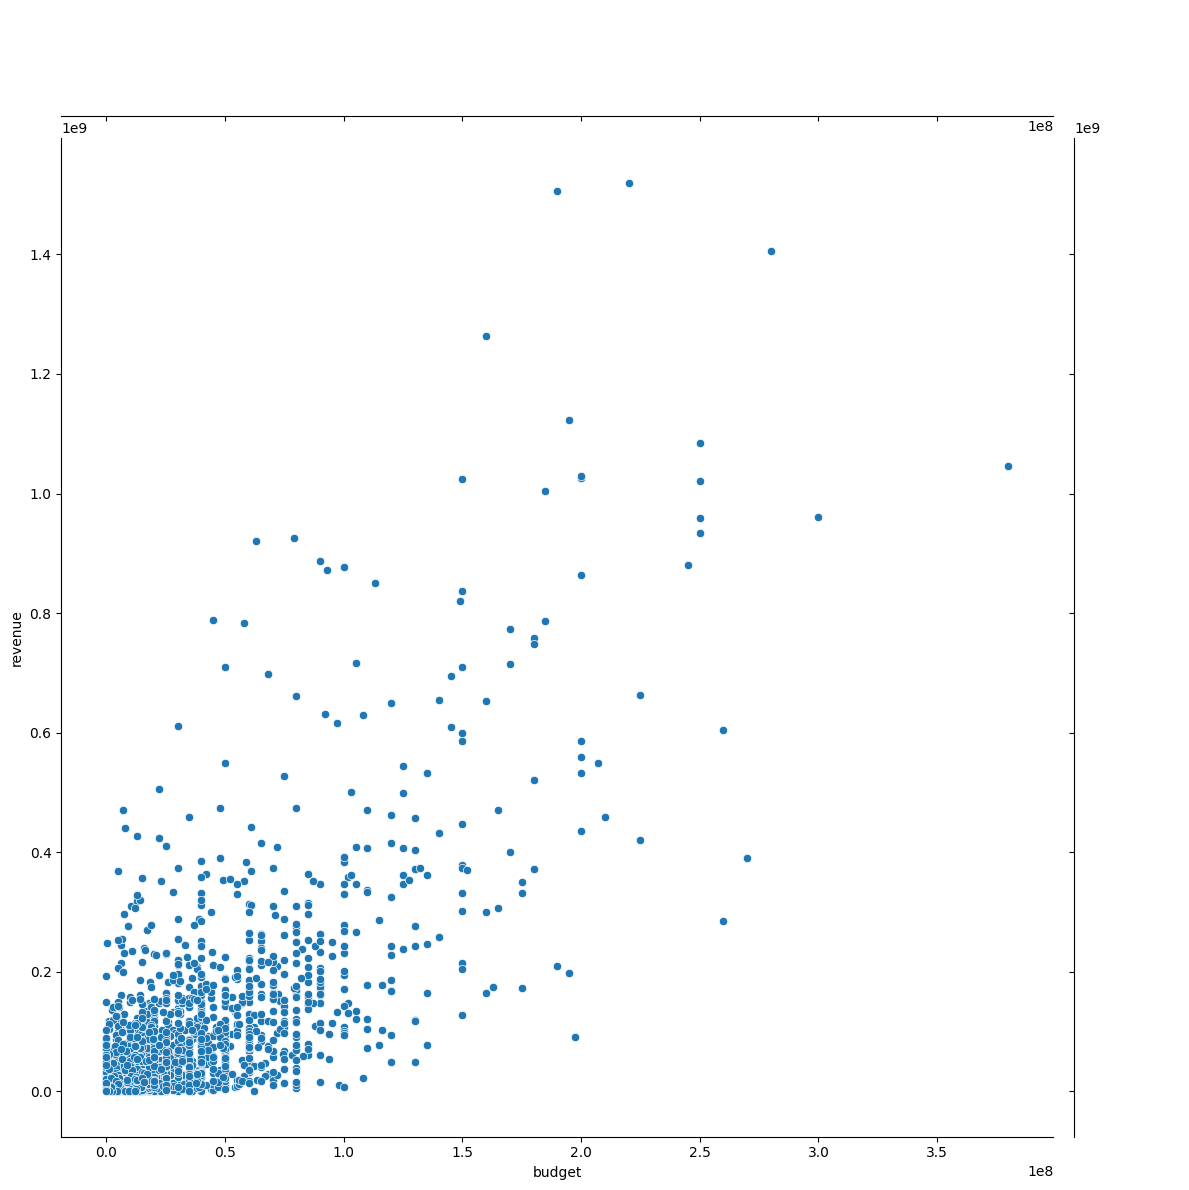

In [4]:
# Create a jointplot to visualize 'budget' against 'revenue' from our training data.
sns.jointplot(x= 'budget', y= 'revenue',data= traindf, height= 12, ratio= 8)
# Add a main title to the plot.
plt.suptitle('Budget Vs. Revenue', y= 1.0, fontsize= 13)
plt.show()

plot popularity vs. revenue and look at distribution:

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

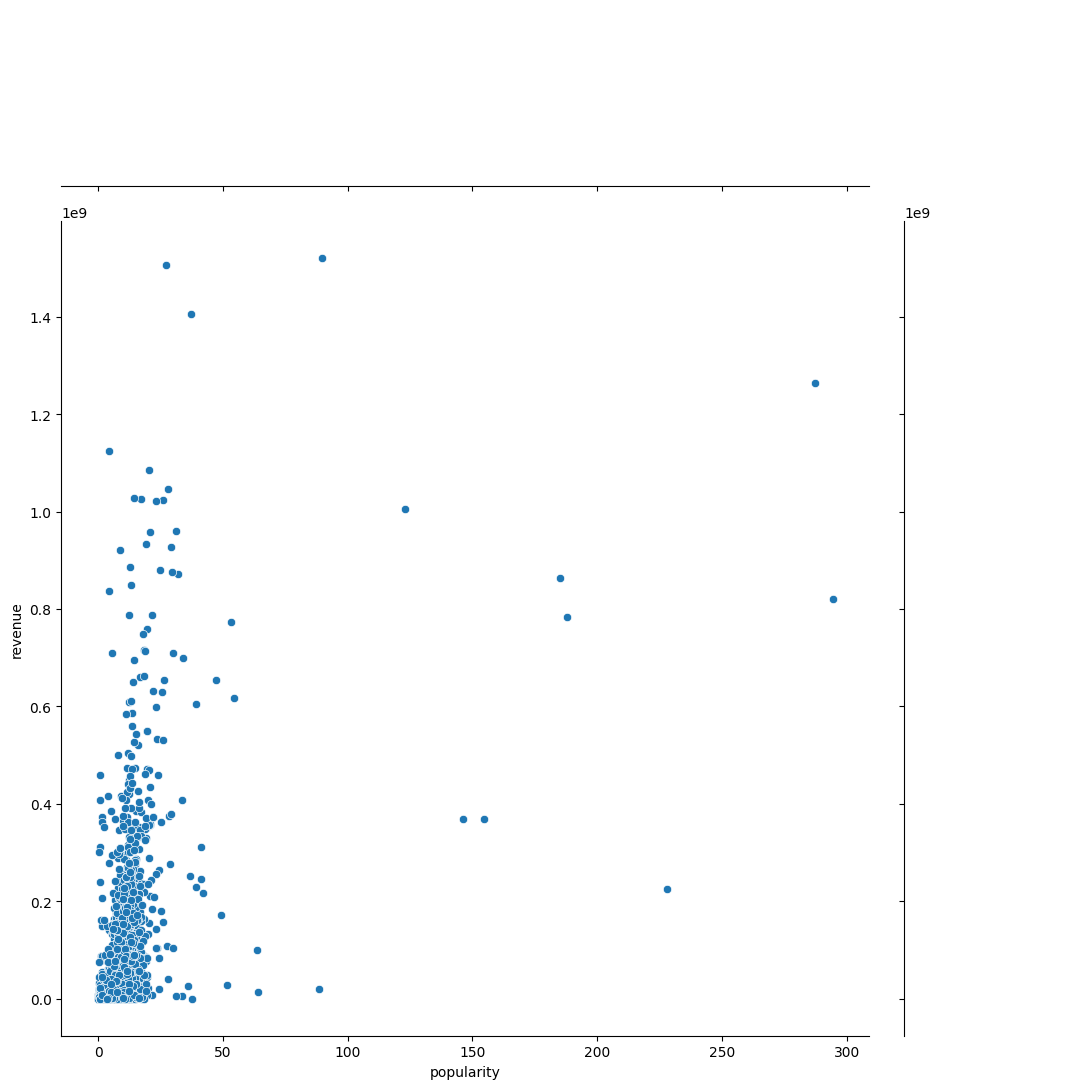

In [6]:
# Create a jointplot to visualize 'popularity' against 'revenue' from our training data.
sns.jointplot(x= 'popularity', y= 'revenue', data= traindf, height= 11, ratio= 4)
plt.suptitle('Popularity Vs. Revenue', y= 1.0, fontsize= 13)
plt.show()



plot runtime vs. revenue:

In [ ]:
sns.jointplot(x= 'runtime', y= 'revenue', data= traindf, height= 11, ratio= 4)
plt.suptitle('Runtime Vs. Revenue', y= 1.0, fontsize= 13)
plt.show()

Revenue (Target variable) Distribution:

In [ ]:
sns.distplot(traindf.revenue)
plt.show()

In [ ]:
traindf.revenue.describe()

Because revenue variable is skewed, let's calculate log of it.  
Here, we're applying a `log1p` transformation to our `revenue` column. This usually helps make its distribution more normal, which is often better for our models. Then, we just quickly visualize this new `logRevenue` column's distribution to see how it looks.

In [ ]:
# Apply a log1p transformation to 'revenue' to normalize its distribution.
traindf['logRevenue'] = np.log1p(traindf.revenue)
# Plot the distribution of the newly created 'logRevenue' column.
sns.distplot(traindf.logRevenue)
plt.show()


get month, day, year, week of day and quarter(season) by release date:

In [5]:
#Since only last two digits of year are provided, this is the correct way of getting the year.
traindf[['release_month', 'release_day', 'release_year']]= traindf['release_date'].str.split(
    '/', expand= True).replace(np.nan, -1).astype(int)
# Some rows have 4 digits of year instead of 2, that's why I am applying (train['release_year'] < 100) this condition
traindf.loc[ (traindf['release_year'] <= 19) & (traindf['release_year'] < 100), "release_year"] += 2000
traindf.loc[ (traindf['release_year'] > 19)  & (traindf['release_year'] < 100), "release_year"] += 1900
release_date = pd.to_datetime(traindf['release_date'])
traindf['release_dayofweek'] = release_date.dt.dayofweek
traindf['release_quarter'] = release_date.dt.quarter

Plot release year count:

In [ ]:
# Create a countplot to show the number of movies released per year, setting figure size and title for clarity.
plt.figure(figsize= (20, 12))
sns.countplot(traindf['release_year'].sort_values())
plt.title('Movie release count by year',  fontsize= 20)
plt.xticks(rotation= 90, fontsize= 12)
plt.show()

In [ ]:
# Create a countplot to visualize movie releases by month, customizing x-axis labels for readability.
plt.figure(figsize= (20,12))
sns.countplot(traindf['release_month'].sort_values())
plt.title('Movie release count by month ', fontsize= 20)
loc, labels = plt.xticks()
loc, labels = loc, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(loc, labels, fontsize= 20)
plt.show()

In [ ]:
# Create a countplot to show the number of movies released per day of the month, setting the plot size and title.
plt.figure(figsize= (20,12))
sns.countplot(traindf['release_day'].sort_values())
plt.title('Movie release count by day', fontsize= 20)
plt.xticks(fontsize= 20)
plt.show()

In [ ]:
# Create a countplot to show movie releases by day of the week, with custom labels for each day.
plt.figure(figsize= (20, 12))
sns.countplot(traindf['release_dayofweek'].sort_values())
plt.title('Movie release count on Day of Week', fontsize= 20)
loc, labels = plt.xticks()
loc, labels = loc, ['Mon', 'Tue', 'Wen', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(loc, labels, fontsize= 20)
plt.show()

In [ ]:
# Create a countplot to visualize movie releases per quarter, setting the plot size and title.
plt.figure(figsize= (20, 12))
sns.countplot(traindf['release_quarter'].sort_values())
plt.title('Movie released count by quarter(season)', fontsize= 20)
plt.xticks(fontsize= 20)
plt.show()

**Mean Revenue by Release Year, months and etc.**

Here, we're calculating the mean `revenue` for each `release_year`, `release_month`, `release_daysofweek` and `release_quarter` and then visualizing it with a bar plot. This helps us quickly see how average movie revenue has trended over different years.

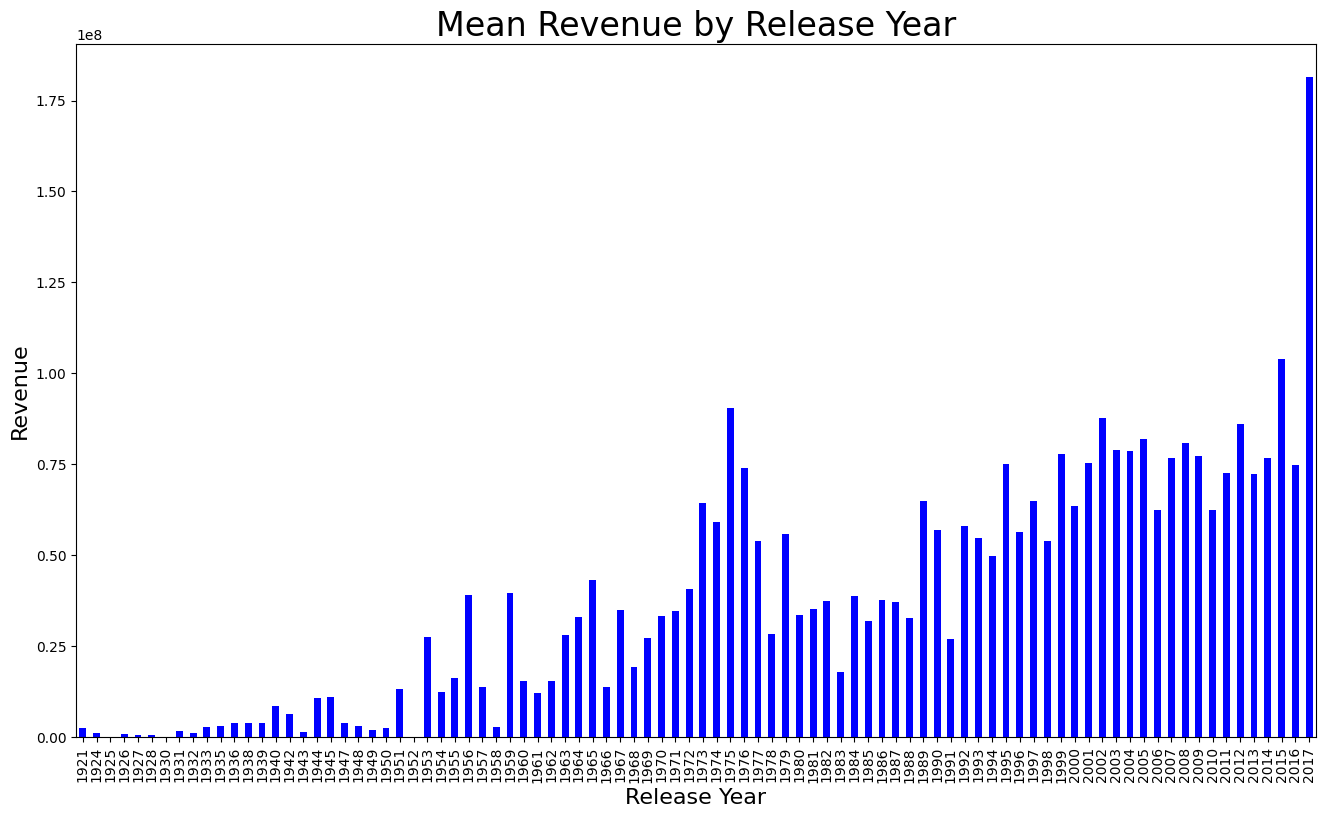

In [6]:
# Calculate and plot the mean revenue by release year as a bar chart with appropriate labels and title.
traindf['mean_revenue_by_year'] = traindf.groupby('release_year')['revenue'].mean()
mean_by_year = traindf.groupby('release_year')['revenue'].mean()
mean_by_year.plot(kind= 'bar', figsize= (16,9), color= 'blue')
plt.xlabel('Release Year', fontsize= 16)
plt.ylabel('Revenue', fontsize= 16)
plt.title('Mean Revenue by Release Year', fontsize= 24)
plt.show()

In [ ]:
# Calculate and plot the mean revenue by release month, customizing x-axis labels for readability.
traindf['mean_revenue_by_month'] = traindf.groupby('release_month')['revenue'].mean()
mean_by_month = traindf.groupby('release_month')['revenue'].mean()
mean_by_month.plot(kind= 'bar', figsize=(16, 9), color= 'blue')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(len(months)), months, fontsize= 16)
plt.xlabel('Month', fontsize= 16)
plt.ylabel('Revenue', fontsize= 16)
plt.title('Mean Revenue by Release Month', fontsize= 24)
plt.show()


plot day of week vs. revenue

In [ ]:
traindf['mean_revenue_by_dayofweek'] = traindf.groupby('release_dayofweek')['revenue'].mean()
mean_by_day = traindf.groupby('release_dayofweek')['revenue'].mean()
mean_by_day.plot(kind='bar', figsize=(16, 9), color='b')
days_labels = ['Mon', 'Tue', 'Wen', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(range(len(days_labels)), days_labels, fontsize= 16, rotation= 0)
plt.xlabel('Day of Week', fontsize= 16)
plt.ylabel('Revenue', fontsize= 16)
plt.title('Mean Revenue by Day of Week', fontsize= 20)
plt.show()

plot quarter(season) vs. revenue

In [ ]:
traindf['mean_revenue_by_quarter'] = traindf.groupby('release_quarter')['revenue'].mean()
mean_by_quarter = traindf.groupby('release_quarter')['revenue'].mean()
mean_by_quarter.plot(kind= 'bar', figsize= (16, 9), color= 'b')
plt.xticks(rotation= 0)
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.title('Mean Revenue by Quarter(Season)', fontsize= 20)
plt.show()

### other plots
**plot runtime vs. revenue**

In [1]:
# Calculate and plot the mean movie runtime per release year.
traindf['mean_runtime_by_year'] = traindf.groupby('release_year')['runtime'].mean()
mean_runtime_by_year = traindf.groupby('release_year')['runtime'].mean()
mean_runtime_by_year.plot(kind= 'bar', figsize=(16, 9),color='b')
plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.title('Movie Mean Runtime by Year', fontsize=20)
plt.show()

NameError: name 'traindf' is not defined

In [ ]:
# Calculate and plot the mean movie popularity per release year.
traindf['mean_popularity_by_year'] = traindf.groupby('release_year')['popularity'].mean()
mean_pop_by_year = traindf.groupby('release_year')['popularity'].mean()
mean_pop_by_year.plot(kind= 'bar', figsize=(15,10),color='b')
plt.xlabel('Release Year', fontsize= 16)
plt.ylabel('Popularity', fontsize= 16)
plt.title('Movie Mean Popularity by Year',fontsize=20)
plt.show()

In [ ]:
# Calculate and plot the mean movie budget per release year.
traindf['mean_budget_by_year'] = traindf.groupby('release_year')['budget'].mean()
mean_bud_by_year = traindf.groupby("release_year")["budget"].mean()
mean_bud_by_year.plot(kind= 'bar', figsize=(16, 9),color= 'b')
plt.xlabel('Release Year', fontsize= 16)
plt.ylabel('Budget', fontsize= 16)
plt.title('Movie Mean Budget by Year',fontsize=20)
plt.show()

In [ ]:
# Create a lineplot to visualize the relationship between movie runtime and revenue.
plt.figure(figsize= (16, 9))
ax = sns.lineplot(data= traindf, x='runtime', y='revenue')
ax.set_xlabel('Runtime', fontsize= 16)
ax.set_ylabel('Revenue', fontsize= 16)
ax.set_title('Revenue vs. Runtime',fontsize=20)
plt.show()

In [ ]:
# Calculate the mean runtime and mean revenue per release year.
plt.figure(figsize= (16, 9))
x = traindf.groupby('release_year')['runtime'].mean()
y = traindf.groupby('release_year')['revenue'].mean()
# Create a bar plot to visualize the relationship between mean runtime and mean revenue.
ax = sns.barplot(x= x, y= y)
ax.set_xlabel('Runtime', fontsize= 16)
ax.set_ylabel('Revenue', fontsize= 16)
ax.set_title('Revenue vs. Runtime',fontsize=20)
# Rotate x-axis labels for better readability.
plt.xticks(
    rotation= 90,
    ha= 'right',
    fontsize= 10
)
plt.show()

In [ ]:
# Create a lineplot to visualize the relationship between movie budget and revenue.
plt.figure(figsize= (16, 9))
ax = sns.lineplot(data= traindf, x='budget', y='revenue')
ax.set_xlabel('Budget', fontsize= 16)
ax.set_ylabel('Revenue', fontsize= 16)
ax.set_title('Revenue vs. Budget',fontsize=20)
plt.show()

In [ ]:
# Calculate the mean budget and mean revenue per release year and plot them as a bar chart.
plt.figure(figsize= (16, 9))
x = traindf.groupby('release_year')['budget'].mean()
y = traindf.groupby('release_year')['revenue'].mean()
ax = sns.barplot(x= x, y= y)
ax.set_xlabel('Budget', fontsize= 16)
ax.set_ylabel('Revenue', fontsize= 16)
ax.set_title('Revenue vs. Budget',fontsize=20)
# Rotate x-axis labels for readability.
plt.xticks(
    rotation= 90,
    ha= 'right',
    fontsize= 10
)
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping.
plt.show()

**Processing and One-Hot Encoding Movie Genres**

This block of code is all about getting our movie `genres` ready for analysis. First, we have a small helper function (`get_dictionary`) that safely turns those string-like genre lists into actual Python objects. After that, we use this helper to pull out all the individual genre names, make sure they're consistently ordered, and then **one-hot encode** them. This means each unique genre gets its own column with `0`s or `1`s. Finally, we merge these new genre columns back into our main data and count how many times each genre appears. simple: count genres in train set :D

In [ ]:
# Safe string-to-dictionary conversion 
def get_dictionary(s):
    try:
        return eval(s)
    except:
        return {}

# Extract genre names and make them consistent using sorted()
traindf['genres'] = traindf['genres'].map(
    lambda x: sorted([d['name'] for d in get_dictionary(x)])
).map(lambda x: ','.join(map(str, x)))  # Converts ['Action', 'Comedy'] → 'Action,Comedy'

# One-hot encode genres
genres = traindf['genres'].str.get_dummies(sep=',')

# Merge encoded genres back into the DataFrame
traindf = pd.concat([traindf, genres], axis=1)

# Count genre occurrences and display nicely
print("Genre                      Count")
print("-" * 30)

genre_counts = {genre: traindf[genre].sum() for genre in genres.columns}
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

for genre, count in sorted_genres:
    print(f"{genre:<25} {count}")

count genres in test set too:

In [ ]:
#Same proccess on test set
testdf['genres'] = testdf['genres'].map(
    lambda x: sorted([d['name'] for d in get_dictionary(x)])
).map(lambda x: ','.join(map(str, x)))  # Converts ['Action', 'Comedy'] → 'Action,Comedy'

# One-hot encode genres
genres = testdf['genres'].str.get_dummies(sep=',')


# Merge encoded genres back into the DataFrame
testdf = pd.concat([testdf, genres], axis=1)

# Count genre occurrences and display nicely
print("Genre                      Count")
print("-" * 30)

genre_counts = {genre: testdf[genre].sum() for genre in genres.columns}
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

for genre, count in sorted_genres:
    print(f"{genre:<25} {count}")

Original Language count

In [ ]:
# Create a countplot to show the number of movies for each original language, ordered by frequency.
plt.figure(figsize= (20, 15))
sns.countplot(x= 'original_language', data= traindf, order= traindf['original_language'].value_counts().index)
plt.title('Original Language Count', fontsize= 18)
plt.show()

Let's look at status of movies

In [ ]:
traindf['status'].value_counts()

So 2996 movies are released and 4 movies are not release yet

In [ ]:
traindf.loc[traindf['status'] == 'Rumored'][['status', 'revenue']]

Let's look at test dataset

In [ ]:
testdf['status'].value_counts()

So as you see, 4389 of movies on test dataset are released and 7 of them not yet.  
What about homepage, tagline and ...?  
Let's look at status of them

In [ ]:
# Create a new binary feature 'has_homepage': 1 if homepage exists, 0 otherwise.
traindf['has_homepage'] = 1
traindf.loc[pd.isnull(traindf['homepage']), 'has_homepage'] = 0
plt.figure(figsize= (12, 7))
# Create a countplot to visualize the distribution of movies with and without a homepage.
sns.countplot(x= 'has_homepage', data= traindf)
plt.title('Has Homepage ?', fontsize= 18)
plt.show()

In [ ]:
# Create a box plot to visualize the relationship between 'has_homepage' and 'revenue'.
sns.catplot(data=traindf, x='has_homepage', y='revenue', kind='box', height= 7, aspect= 1.5)
plt.title('Has Homepage vs. Revenue Correlation')
plt.show()

In [ ]:
# Create a new binary feature 'isTaglineNA': 1 if tagline is missing (NaN), 0 otherwise.
traindf['isTaglineNA'] = 0
traindf.loc[pd.isnull(traindf['tagline']), 'isTaglineNA'] = 1
sns.catplot(x= 'isTaglineNA', y= 'revenue', data= traindf, kind= 'box', height= 7, aspect= 1.5)
plt.title('Revenue correlation to with or without tagline')
plt.show()

In [ ]:
# Create a new binary feature 'isDifferentTitle': 1 if 'original_title' is different from 'title', 0 otherwise.
traindf['isDifferentTitle'] = 1
traindf.loc[traindf['original_title'] == traindf['title'], 'isDifferentTitle'] = 0
sns.catplot(x= 'isDifferentTitle', y= 'revenue', data= traindf, kind= 'box', height= 7, aspect= 1.5)
plt.title('Revenue correlation to different and single titles movies')
plt.show()

In [ ]:
# Create a new binary feature 'isOriginalLanguageEng': 1 if the original language is English ('en'), 0 otherwise.
traindf['isOriginalLanguageEng'] = 0
traindf.loc[traindf['original_language'] == 'en', 'isOriginalLanguageEng'] = 1
sns.catplot(x= 'isOriginalLanguageEng', y= 'revenue', data= traindf, kind='box', height= 7, aspect= 1.5)
plt.title('Revenue correlation between English Language movies and others')
plt.show()

Now let's add additional features to our datasets

In [ ]:
# Read adittional features
trainAdditionalFeatures = pd.read_csv('./data/TrainAdditionalFeatures.csv')
testAdditionalFeatures = pd.read_csv('./data/TestAdditionalFeatures.csv')

In [ ]:
# Merge additional features
traindf = pd.merge(traindf, trainAdditionalFeatures, how= 'left', on= ['imdb_id'])
testdf = pd.merge(testdf, testAdditionalFeatures, how= 'left', on= ['imdb_id'])

Let's explore missing values

In [ ]:
print('Missing rating in train set: ', traindf['rating'].isna().sum())
print('Missing rating in test set: ', testdf['rating'].isna().sum())
print('Missing total votes in train set: ', traindf['totalVotes'].isna().sum())
print('Missing total votes in test set: ', testdf['totalVotes'].isna().sum())
print('Missing popularity in train set: ', traindf['popularity2'].isna().sum())
print('Missing popularity in test set: ', testdf['popularity2'].isna().sum())

Fill Missing Rating & Total Votes  

$Note$: Actually, I downloaded the data from my website's database: MoviesRE.com . Before few months, I deleted movies with less than 10 votes or 2.1 rating. So probably around 80% of the missing rows will have less than 10 votes or 2.1 rating.  
So let's fill them with random number less than 2.1 and 10.

In [ ]:
# Impute missing 'rating' values in the training set using a scaled beta distribution.
mask_train_rating = traindf['rating'].isna()
rand = np.random.beta(a=5, b=2, size=mask_train_rating.sum())
scaled = 0.5 + rand * (2.1 - 0.5)
traindf.loc[mask_train_rating, 'rating'] = np.round(scaled, 1)
# Impute missing 'rating' values in the test set using the same scaled beta distribution.
mask_test_rating = testdf['rating'].isna()
rand = np.random.beta(a=5, b=2, size=mask_test_rating.sum())
scaled = 0.5 + rand * (2.1 - 0.5)
testdf.loc[mask_test_rating, 'rating'] = np.round(scaled, 1)
# Impute missing 'totalVotes' values in the training set using a scaled beta distribution.
mask_train_vote = traindf['totalVotes'].isna()
rand = np.random.beta(a=5, b=2, size=mask_train_vote.sum())
scaled = 1 + rand * (10 - 1)
traindf.loc[mask_train_vote, 'totalVotes'] = np.round(scaled, 1)
# Impute missing 'totalVotes' values in the test set using the same scaled beta distribution.
mask_test_vote = testdf['totalVotes'].isna()
rand = np.random.beta(a=5, b=2, size=mask_test_vote.sum())
scaled = 1 + rand * (10 - 1)
testdf.loc[mask_test_vote, 'totalVotes'] = np.round(scaled, 1)

So let's look at populartity. first we plot it in histogram

In [ ]:
traindf['popularity2'].hist(bins=50)
plt.show()

Its `right-skewed` .       
So we fill missing values with `median`.
 

In [ ]:
traindf['popularity2'].fillna(traindf['popularity2'].median(), inplace= True)
testdf['popularity2'].fillna(testdf['popularity2'].median(), inplace= True)

Check again missing values

In [ ]:
print('Missing rating in train set: ', traindf['rating'].isna().sum())
print('Missing rating in test set: ', testdf['rating'].isna().sum())
print('Missing total votes in train set: ', traindf['totalVotes'].isna().sum())
print('Missing total votes in test set: ', testdf['totalVotes'].isna().sum())
print('Missing popularity in train set: ', traindf['popularity2'].isna().sum())
print('Missing popularity in test set: ', testdf['popularity2'].isna().sum())

Train set Rating counts

In [ ]:
# Create a countplot to show the distribution of movie ratings.
plt.figure(figsize= (20, 15))
sns.countplot(traindf['rating'].sort_values())
plt.title('Rating counts')
plt.xticks(rotation= 90)
plt.show()

Test set rating counts

In [ ]:
plt.figure(figsize= (20, 15))
sns.countplot(testdf['rating'].sort_values())
plt.title('Test Rating counts')
plt.xticks(rotation= 90)
plt.show()

In [ ]:
# Calculate and plot the mean revenue per movie rating as a bar chart.
traindf['mean_revenue_by_rating'] = traindf.groupby('rating')['revenue'].mean()
mean_by_rating = traindf.groupby('rating')['revenue'].mean()
mean_by_rating.plot(kind= 'bar', figsize= (16,9), color= 'blue')
plt.xlabel('Rating', fontsize= 16)
plt.ylabel('Revenue', fontsize= 16)
plt.title('Mean Revenue by Rating', fontsize= 24)
plt.show()

In [ ]:
# Calculate and plot the mean revenue per 'totalVotes' as a bar chart.
traindf['mean_revenue_by_totalVotes'] = traindf.groupby('totalVotes')['revenue'].mean()
mean_by_votes = traindf.groupby('totalVotes')['revenue'].mean()
mean_by_votes.plot(kind= 'bar', figsize= (16,9), color= 'blue')
plt.xticks(np.arange(0, 2500, 500))
plt.xlabel('Total Votes', fontsize= 16)
plt.ylabel('Revenue', fontsize= 16)
plt.title('Mean Revenue by Total Votes', fontsize= 24)
plt.show()

In [ ]:
# Calculate and plot the mean total votes per movie rating as a bar chart.
traindf['mean_totalVotes_by_rating'] = traindf.groupby('rating')['totalVotes'].mean()
mean_by_ratingVote = traindf.groupby('rating')['totalVotes'].mean()
mean_by_ratingVote.plot(kind= 'bar', figsize= (16,9), color= 'blue')
plt.xlabel('Rating', fontsize= 16)
plt.ylabel('Total Votes', fontsize= 16)
plt.title('Mean Votes by Rating', fontsize= 24)
plt.show()

**Feature Correlation Heatmap**

Here, we're creating a heatmap to visualize the **correlation** between several key numerical features in our training data. This helps us quickly identify which features are strongly related to each other, especially how they correlate with `revenue`.

In [ ]:
# Select key numerical features to analyze their correlations.
features = traindf[['budget','rating','totalVotes',
                    'popularity','runtime','release_year'
                    ,'release_month','release_dayofweek','revenue']]
# Generate and display a heatmap of the correlation matrix for the selected features.
sns.heatmap(features.corr(), annot= True)
plt.show()

# Feature Engineering and Prediction
## **Understanding Feature Engineering**

Feature engineering is the process of creating new input features for a machine learning model from existing raw data. It's a crucial step that allows us to transform raw data into a format that better represents the underlying problem to the model, often leading to significant improvements in model performance by helping it discover hidden patterns and relationships.
I am using two external datasets.

- TMDB Competition Additional Features: This dataset contain rating & number of votes of a movie.
- TMDB Competition Additional Training Data: This dataset contain around 2,000 additional rows, which I am using for training the data.  
I am also manually fixing the budget & revenue of some rows below. Let me know, if any part is not clear.

## **`prepare(df)` Function: Comprehensive Feature Engineering**

This `prepare(df)` function is a robust pipeline designed to transform raw movie data into a rich set of features suitable for machine learning, handling various data types and missing values. It performs extensive feature engineering, creating new variables and converting categorical data into numerical formats, which is crucial for building a predictive model.

### **Date and Time Features**

The function starts by extracting more granular date features from `release_date`. It correctly splits the date into `release_month`, `release_day`, and `release_year`. A critical step involves fixing two-digit year entries to ensure they fall into the correct century (1900s or 2000s). It also derives `release_daysofweek` and `release_quarter` to capture cyclical patterns in movie releases.

### **Imputing Missing `rating` and `totalVotes`**

Next, the function handles missing values for `rating` and `totalVotes`. Instead of simple imputation, it groups the data by `release_year` and `original_language` to calculate the mean `rating` and `totalVotes` within these specific groups. These group-wise means are then used to fill the respective `NaN` values, providing a more context-aware imputation. After filling, the temporary mean columns are dropped. A `weightedRating` feature is also calculated using a standard formula, combining both rating and total votes to create a more stable measure of movie quality.

### **Budget Transformation and Crew Genders**

The original `budget` is preserved as `originalBudget`, and an `inflationBudget` is calculated, projecting the budget to 2018 values based on a simple inflation rate. Crucially, the main `budget` column is then **log-transformed using `np.log1p`** to handle its typically skewed distribution, making it more suitable for linear models. Features are also extracted for `genders_0_crew`, `genders_1_crew`, and `genders_2_crew` by parsing the `crew` JSON data to count occurrences of different gender types.

### **Collection Names and Counts**

The `collection_name` is extracted from the `belongs_to_collection` JSON field, and then **Label Encoded** to convert categorical collection names into numerical labels. Additionally, several count-based features are created: `num_keyword` (from `Keywords`), `num_cast` (from `cast`), `original_title_letter_count`, `original_title_word_count`, `title_word_count`, `overview_word_count`, `tagline_word_count`, `production_countries_count`, `production_companies_count`, `cast_count`, and `crew_count`.

### **Creating Ratio and Binary Features**

A wide array of **ratio features** are generated by combining existing numerical columns, such as `budget_runtime_ratio`, `budget_populrity_ratio`, `popularity_totalVotes_ratio`, `rating_popularity_ratio`, and more. These ratios can capture complex relationships not apparent in raw features. Furthermore, several **binary (0/1) flag features** are created to indicate the presence or absence of specific attributes like `has_homepage`, `isbelongs_to_collectionNA` (missing collection info), `isTaglineNA`, `isOriginalLanguageEN` (English language), `isTitleDifferent`, and `isReleased` (movie status).

### **JSON Column One-Hot Encoding and Final Cleanup**

A critical part of this function handles complex JSON columns like `production_companies`, `production_countries`, `spoken_languages`, and `genres`. For each of these:
1.  It parses the string data into a list of dictionaries, extracts the `name` from each, and then standardizes them by sorting and joining them into a comma-separated string.
2.  It also **identifies categories not seen in the training data** and maps them to an `_etc` category to prevent unseen labels in the test set.
3.  These processed strings are then **one-hot encoded using `str.get_dummies()`**, creating new binary columns for each unique category.
4.  These one-hot encoded columns are **concatenated** back into the main DataFrame.
Finally, numerous original and intermediate columns that are no longer needed (e.g., raw IDs, text descriptions, original JSON columns) are dropped to reduce dimensionality. Any remaining `NaN` values are filled with `0.0` as a final cleanup step before the processed DataFrame is returned.

**Safe Data Preparation Function**

This `safe_prepare` function is a quick way to clean your DataFrame. It replaces infinite values with `NaN`, fills any remaining `NaN`s with column means, and then converts everything to `float32` for efficiency.

In [ ]:
def safe_prepare(df):
    # Replace infinities with NaN, fill NaNs with column means, and convert DataFrame to float32.
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.fillna(df.mean())  # or df.fillna(df.median())
    return df.astype(np.float32)

In [ ]:
# Comprehensive function to prepare DataFrame for modeling by engineering new features and cleaning existing ones.
def prepare(df):
    global json_cols # Global variable (not defined in this snippet but implied from context)
    global train_dict # Global variable (not defined in this snippet but implied from context)
    
    # Date feature extraction and correction for two-digit years.
    df[['release_month', 'release_day', 'release_year']] = df['release_date'].str.split('/', expand= 
    True).replace(np.nan, 0).astype(int)
    df['release_year'] = df['release_year']
    df.loc[ (df['release_year'] <= 19) & (df['release_year'] < 100) , 'release_year'] += 2000
    df.loc[ (df['release_year'] > 19 ) & (df['release_year'] < 100) , 'release_year'] += 1000
    releaseDate = pd.to_datetime(df['release_date'])
    df['release_daysofweek'] = releaseDate.dt.dayofweek
    df['release_quarter'] = releaseDate.dt.quarter
    # Impute missing 'rating' by grouping by release year and original language.
    rating_na = df.groupby(['release_year', 'original_language'])['rating'].mean().reset_index()
    df = df.merge(rating_na, how='left', on=["release_year", "original_language"], suffixes=('', '_mean'))
    df['rating'] = df['rating'].fillna(df['rating_mean'])
    df.drop(columns='rating_mean', inplace=True)
    # Impute missing 'totalVotes' by grouping by release year and original language.
    totalvotes_na = df.groupby(['release_year', 'original_language'])['totalVotes'].mean().reset_index()
    df = df.merge(totalvotes_na, how= 'left', on= ['release_year', 'original_language'], suffixes=('', '_mean'))
    df['totalVotes'] = df['totalVotes'].fillna(df['totalVotes_mean'])
    df.drop(columns='totalVotes_mean', inplace= True)
     # Create 'weightedRating' feature.
    df['weightedRating'] = (df['rating'] * df['totalVotes'] + 6.367 * 1000) / (df['totalVotes'] + 1000)
    # Handle budget: preserve original, calculate inflation budget, and log-transform the main budget.
    df['originalBudget'] = df['budget']
    df['inflationBudget'] = df['budget'] + df['budget'] *1.8/100*(2018 - df['release_year'])
    df['budget'] = np.log1p(df['budget'])
    # Thanks to this Kernel for the next 7 features https://
    #www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation
    
    # Extract crew gender counts from 'crew' JSON.
    df['genders_0_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    df['genders_1_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    df['genders_2_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
    df['collection_name'] = df['belongs_to_collection'].apply(
        lambda x: x[0]['name'] if isinstance(x, list) and len(x) > 0 else 0
    )
    # Extract and Label Encode 'collection_name'.
    le = LabelEncoder()
    le.fit(list(df['collection_name'].fillna('')))
    df['collection_name'] = le.transform(df['collection_name'].fillna('').astype(str))
    # Create count features for keywords and cast.
    df['num_keyword'] = df['Keywords'].apply(lambda x: len(x) if x!= {} else 0)
    df['num_cast'] = df['cast'].apply(lambda x: len(x) if x!= {} else 0)
    # Create various ratio features.
    df['popularity_mean_year'] = df['popularity'] / df.groupby('release_year')['popularity'].transform('mean')
    df['budget_runtime_ratio'] = df['budget'] / df['runtime']
    df['budget_populrity_ratio'] = df['budget'] / df['popularity']
    df['budget_year_ratio'] = df['budget'] / (df['release_year'] * df['release_year'])
    df['year_popularity_ratio1'] = df['release_year'] / df['popularity']
    df['year_populairty_ratio2'] = df['popularity'] / df['release_year']
    df['popularity_totalVotes_ratio'] = df['popularity'] / df['totalVotes']
    df['rating_popularity_ratio'] = df['rating'] / df['popularity']
    df['rating_totalVotes_ratio'] = df['rating'] / df['totalVotes']
    df['totalVotes_year_ratio'] = df['totalVotes'] / df['release_year']
    df['budget_rating_ratio'] = df['budget'] / df['rating']
    df['runtime_rating_ratio'] = df['runtime'] / df['rating']
    df['budget_totalVotes_ratio'] = df['budget'] / df['totalVotes']
    
    # Create binary flag features for presence/absence of certain attributes.
    df['has_homepage'] = 1
    df.loc[pd.isnull(df['homepage']), 'has_homepage'] = 0
    
    df['isbelongs_to_collectionNA'] = 0
    df.loc[pd.isnull(df['belongs_to_collection']), 'is_belongs_to_collectionNA'] = 1
    
    df['isTaglineNA'] = 0
    df.loc[df['tagline'] == 0, 'isTaglineNA'] = 1
    
    df['isOriginalLanguageEN'] = 0
    df.loc[df['original_language'] == 'en', 'isOriginalLanguageEN'] = 1
    
    df['isTitleDifferent'] = 1
    df.loc[df['original_title'] == df['title'], 'isTitleDifferent'] = 0
    
    df['isReleased'] = 1
    df.loc[df['status'] != 'Released', 'isReleased'] = 0
    
    # Extract collection_id.
    df['collection_id'] = df['belongs_to_collection'].apply(lambda x: np.nan if len(x) == 0 else x[0]['id'])
    # Create word/letter count features from text columns.
    df['original_title_letter_count'] = df['original_title'].str.len()
    df['orignal_title_word_count'] = df['original_title'].str.split().str.len()
    
    df['title_word_count'] = df['title'].str.split().str.len()
    df['overview_word_count'] = df['overview'].str.split().str.len()
    df['tagline_word_count'] = df['tagline'].str.split().str.len()
    
    df['production_countries_count'] = df['production_countries'].apply(lambda x: len(x))
    df['production_companies_count'] = df['production_companies'].apply(lambda x: len(x))
    df['cast_count'] = df['cast'].apply(lambda x: len(x))
    df['crew_count'] = df['crew'].apply(lambda x: len(x))
    # Create count features for production entities and cast/crew.
    df['meanRuntimeByYear'] = df.groupby('release_day')['runtime'].transform('mean')
    df['meanPopularityByYear'] = df.groupby('release_year')['popularity'].transform('mean')
    df['meanBudgetByYear'] = df.groupby('release_year')['budget'].transform('mean')
    df['meantotalVotesByYear'] = df.groupby('release_year')['totalVotes'].transform('mean')
    df['meantotalVotesByYear'] = df.groupby('release_year')['totalVotes'].transform('mean')
    df['medianBudgetByYear'] = df.groupby('release_year')['budget'].transform('median')
    
    # Process and one-hot encode JSON columns ('production_companies', 'production_countries', etc.).
    for col in ['production_companies', 'production_countries', 'spoken_languages', 'genres']:
        # Extract names, handle unknown categories, sort, and join into a comma-separated string.
        df[col] = df[col].map(lambda x: sorted(list(set(
            [n if n in train_dict[col] else col + '_etc' for n in [d['name'] for d in x]])))).map(lambda x: ','.join(map(str, x))
        )
        # One-hot encode the processed column and concatenate to DataFrame.
        temp = df[col].str.get_dummies(sep =',')
        df = pd.concat([df, temp], axis= 1, sort= False)
    # Drop specific 'genres_etc' column if it exists.
    df.drop('genres_etc' ,axis=1 ,inplace= True)
    # Drop original and intermediate columns that are no longer needed.                                                                                              
    df.drop(['title', 'cast', 'Keywords', 'spoken_languages', 
            'production_companies', 'production_countries', 
            'id', 'belongs_to_collection', 'revenue', 'overview', 
            'original_language', 'poster_path', 'homepage', 
            'runtime', 'genres', 'crew', 'imdb_id', 'release_date', 
            'tagline', 'collection_id', 'original_title', 'status'], axis= 1, inplace= True)
    # Fill any remaining NaN values with 0.0.
    df.fillna(value = 0.0, inplace= True)
    
    return df

### **Loading Data and Correcting Outliers**

Here, we're kicking things off by loading our **training dataset** from `train.csv`. After loading, you'll notice a series of `train.loc` calls. This is where we manually **correct specific budget and revenue values** for certain movies. These corrections are often necessary because some initial data points might be outliers or contain inaccuracies that could throw off our model's learning process. By manually fixing these known issues, we ensure our model gets cleaner, more reliable data to train on.

In [ ]:
train = pd.read_csv('./data/train.csv')
# Manually correct specific budget and revenue values for identified movie IDs.

train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1
train.loc[train['id'] == 2696,'budget'] = 10000000

In [ ]:
test = pd.read_csv('./data/test.csv')
# Manually correct specific budget and revenue values for identified movie IDs.
test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

Now in this section, first create a empty column for test data set and then add additional features and train datas for create more robusted model

**Preparing Test Data and Merging Additional Datasets**

We're setting up the `test` dataset by adding a placeholder `revenue` column. Then, we merge **additional features** from external CSVs (`TrainAdditionalFeatures.csv` and `TestAdditionalFeatures.csv`) into both our `train` and `test` DataFrames using `imdb_id`. We also combine an `additionalTrainData.csv` with our `train` DataFrame, making sure its `release_date` format is consistent. Finally, we apply a $\text{log1p}$ transformation to the `revenue` column in `train` for better data distribution, and then print the resulting column names and shape of the `train` DataFrame to verify the changes.

In [ ]:
# Prepare test data by adding a 'revenue' column, merge additional features, concatenate extra training data, and log-transform revenue.
test['revenue'] = np.nan
add_feat_train = pd.read_csv('./data/TrainAdditionalFeatures.csv')
train = pd.merge(train, add_feat_train, how='left', on=['imdb_id'])
add_feat_test = pd.read_csv('./data/TestAdditionalFeatures.csv')
test = pd.merge(test, add_feat_test, how='left', on=['imdb_id'])
additional_train = pd.read_csv('./data/additionalTrainData.csv')
additional_train['release_date'] = additional_train['release_date'].astype(str)
additional_train['release_date'] = additional_train['release_date'].str.replace('-', '/')
train = pd.concat([train, additional_train])
train['revenue'] = np.log1p(train['revenue'])
print(train.columns)
print(train.shape)

In [ ]:
# Extract the 'revenue' column values from the 'train' DataFrame to serve as the target variable 'y'.
y = train['revenue'].values

**Processing JSON Columns and Handling Infrequent Categories**

This comprehensive code block focuses on parsing and cleaning various **JSON-formatted columns** in your movie dataset. It begins by defining a list of JSON columns to process, including `genres`, `production_companies`, and `cast`.

A crucial helper function, `get_dictionary(s)`, is defined to safely convert JSON strings into Python dictionaries or lists. It uses `json.loads` and handles potential errors by returning an empty list. This function is then applied to all specified JSON columns in both the `train` and `test` DataFrames, effectively transforming string representations into usable Python objects.

Next, the `get_json_dict(df, json_columns)` function iterates through the processed JSON columns to count the occurrences of each unique item's 'name' (e.g., each genre, each company). This creates a dictionary of counts for every category within each JSON column, separately for the `train` and `test` datasets.

Finally, the code loops through these JSON columns to **remove categories with bias or low frequency**. It identifies categories present in one dataset but not the other, as well as categories appearing less than 10 times or having empty names across both datasets. These infrequent or inconsistent categories are then removed from both `train_dict` and `test_dict`, ensuring that only robust and relevant categories are retained for further feature engineering.

In [ ]:
json_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

# Helper function to safely convert JSON strings to Python objects.
def get_dictionary(s):
    try:
        return json.loads(s.replace("'", '"'))
    except:
        return []

# Apply get_dictionary to all specified JSON columns in both train and test DataFrames.
for col in tqdm(json_cols + ['belongs_to_collection']) :
    train[col] = train[col].apply(lambda x : get_dictionary(x))
    test[col] = test[col].apply(lambda x : get_dictionary(x))
    
# Function to count occurrences of items within JSON columns.    
def get_json_dict(df, json_columns):
    result = {}

    for col in json_columns:
        counter = {}

        for row in df[col]:
            if not isinstance(row, list):
                continue

            for item in row:
                name = item.get('name')
                if name:
                    counter[name] = counter.get(name, 0) + 1

        result[col] = counter

    return result


# Get dictionaries of counts for train and test JSON columns.
train_dict = get_json_dict(train, json_cols)
test_dict = get_json_dict(test, json_cols)

# remove cateogry with bias and low frequency
for col in json_cols:
    remove = []
    train_id = set(list(train_dict[col].keys()))
    test_id = set(list(test_dict[col].keys()))
    remove += list(train_id - test_id) + list(test_id - train_id)
    for i in train_id.union(test_id) - set(remove):
        if train_dict[col][i] < 10 or i == '':
            remove += [i]
    # Delete identified categories from both train_dict and test_dict.
    for i in remove:
        if i in train_dict[col]:
            del train_dict[col][i]
        if i in test_dict[col]:
            del test_dict[col][i]

**Consolidating and Preparing All Data**

Here, we're combining our `train` and `test` DataFrames and then applying our comprehensive `prepare` function to the merged dataset. This ensures that all the feature engineering steps are applied uniformly. After this, the `all_data` is neatly split back into separate `train` and `test` DataFrames, maintaining their original row counts but now with all the new, processed features.

In [ ]:
# Concatenate train and test data, apply the 'prepare' function for feature engineering, then split back into train and test sets.
all_data = prepare(pd.concat([train, test]).reset_index(drop= True))
train = all_data.loc[: train.shape[0] - 1, :]
test = all_data.loc[train.shape[0]: , :]

**Setting Up K-Fold Cross-Validation**

Here, we're setting up a **K-Fold cross-validation** strategy. We're using `KFold` from `sklearn.model_selection` to divide our `train` dataset into $10$ different folds ($k = 10$). The `shuffle=True` ensures the data is randomly mixed before splitting, and `random_state = 2025` makes sure our folds are reproducible every time we run the code. The `fold` variable will then contain the indices for each of these $10$ training and validation splits.

In [ ]:
from sklearn.model_selection import KFold
# Set up K-Fold cross-validation with 10 splits, shuffling the data and using a fixed random state for reproducibility.
random_seed = 2025
k = 10
fold = list(KFold(k, shuffle= True, random_state= random_seed).split(train))

## Training with `XGBoost`
**XGBoost Model Training Function**

This `xgb_model` function trains an **XGBoost Regressor**, first using `safe_prepare` to clean data by handling infinities and missing values. It defines hyperparameters like learning rate ($\eta$) and maximum tree depth, then trains the model on optimized `DMatrix` objects. Using early stopping, it prevents overfitting by stopping when the validation RMSE no longer improves. The function then predicts on the validation and test sets using the best iteration and returns these predictions, the validation RMSE, and feature importances based on feature usage ('weight').

In [ ]:
import xgboost as xgb
def xgb_model(train_x, train_y, val_x, val_y, test, verbose):
    # Apply safe_prepare to handle NaN and infinite values in input data.
    train_x = safe_prepare(train_x)
    val_x = safe_prepare(val_x)
    test = safe_prepare(test)
    # Define XGBoost model parameters.
    params = {
        
        'objective' : 'reg:squarederror',   # Objective function for regression (squared error).
        'eta' : 0.1,                        # Learning rate (step size shrinkage to prevent overfitting).
        'max_depth' : 6,                    # Maximum depth of a tree.
        'subsample' : 0.6,                  # Subsample ratio of the training instance (fraction of data used per tree).
        'colsample_bytree' : 0.7,           # Subsample ratio of columns when constructing each tree.
        'eval_metric' : 'rmse',             # Evaluation metric to monitor during training (Root Mean Squared Error).
        'seed' : random_seed,               # Random seed for reproducibility of results.
        'tree_method' : 'hist'              # Use the faster histogram-based tree method.
        
    }
    # Convert pandas DataFrames to XGBoost's optimized DMatrix format.
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dval = xgb.DMatrix(val_x, label=val_y)
    dtest = xgb.DMatrix(test)
    
    evals_result = {}# Dictionary to store evaluation metrics during training.
    # Train the XGBoost model.
    model = xgb.train(
        params,
        dtrain= dtrain,
        num_boost_round= 100000,                                 # Maximum number of boosting rounds.
        evals= [(dtrain, 'train'), (dval, 'valid')],             # Evaluation sets for monitoring performance.
        early_stopping_rounds= 2500,                             # Stop training if validation metric doesn't improve for 2500 rounds.
        verbose_eval= verbose,                                   # Control verbosity of training output.
        evals_result= evals_result                               # Store evaluation results.
    )
    
    best_idx = model.best_iteration # Get the index of the boosting round with the best performance.
    # Make predictions using the model from its best iteration.
    val_pred = model.predict(dval, iteration_range= (0, best_idx + 1))
    test_pred = model.predict(dtest, iteration_range= (0, best_idx + 1))
    # Get feature importances based on 'weight' (how many times a feature is used in a split).
    importance = list(model.get_score(importance_type= 'weight').values())
    
    # Return a dictionary containing validation predictions, test predictions, best error, and feature importances.
    return {
        'val' : val_pred,
        'test' : test_pred,
        'error' : evals_result['valid']['rmse'][best_idx],
        'importance' : importance
        
    }

## Training with `LightgGBM`
**LightGBM Model Training Function**

This `lgb_model` function is designed to train a **LightGBM Regressor**, a highly efficient gradient boosting framework. It takes in training, validation, and test data, providing predictions, assessing validation error, and revealing feature importances.

The function sets up **hyperparameters** such as `num_leaves` and `max_depth` to control tree complexity, `learning_rate` for step size, and `feature_fraction` and `bagging_fraction` for subsampling to prevent overfitting. It also includes $\lambda_1$ (L1 regularization) to penalize large weights and `rmse` as the evaluation metric. The data is then prepared into LightGBM's optimized `Dataset` format. During training, it uses **early stopping** (stopping if validation RMSE doesn't improve for $500$ rounds) to efficiently prevent overfitting and records performance metrics.

Finally, the function determines the best model iteration based on the lowest validation RMSE, generates predictions for both validation and test sets, and returns these predictions along with the optimal RMSE and feature importances based on 'gain'.

In [ ]:
import lightgbm as lgb

def lgb_model(train_x, train_y, val_x, val_y, test, verbose):
    # Define LightGBM model parameters.
    params = {
        'objective' : 'regression',      # Set the objective to regression for continuous target variables.
        'num_leaves' : 30,               # Maximum number of leaves in one tree.
        'min_data_in_leaf' : 20,         # Minimum number of data needed in a child (leaf) to prevent overfitting.
        'max_depth' : 9,                 # Maximum depth for tree models.
        'learning_rate' : 0.005,         # Step size shrinkage in each boosting step.
        'feature_fraction' : 0.9,        # Fraction of features to consider at each split (column subsampling).
        'bagging_freq' : 1,              # Frequency for bagging (0 means disabled, 1 means every iteration).
        'bagging_fraction' : 0.9,        # Fraction of data to sample for bagging (row subsampling).
        'lambda_l1' : 0.2,               # L1 regularization (Lasso regularization) applied to weights.
        'bagging_seed' : random_seed,    # Random seed for bagging operation reproducibility.
        'metric' : 'rmse',               # Evaluation metric for monitoring performance during training.
        'random_state' : random_seed,    # Global random seed for overall model reproducibility.
        'verbosity' : -1                 # Controls the verbosity of logging output during training (-1 for silent).
    }
    # Create LightGBM Dataset objects, which are optimized for LightGBM's training process.
    train_set = lgb.Dataset(train_x, label=train_y)
    val_set = lgb.Dataset(val_x, label=val_y)
    
    record = dict()# Initialize a dictionary to record evaluation results per iteration.
    # Train the LightGBM model.
    model = lgb.train(
        params,                         # Model parameters.
        train_set=train_set,            # Training dataset.
        num_boost_round=10000,          # Maximum number of boosting iterations.
        valid_sets=[val_set],           # List of validation sets.
        valid_names=['valid_0'],        # Names corresponding to valid_sets.
        callbacks=[
            lgb.early_stopping(stopping_rounds=500), # Stop training if the validation metric doesn't improve for 500 rounds.
            lgb.record_evaluation(record),          # Callback to record evaluation metrics into the 'record' dictionary.
            lgb.log_evaluation(period=verbose),     # Callback to print evaluation metrics to the console periodically.
        ]
    )
    
    # Find the index of the best iteration (where RMSE was minimum on the validation set).
    best_idx = np.argmin(np.array(record['valid_0']['rmse']))
    # Make predictions on the validation set using the model at its best iteration.
    val_pred = model.predict(val_x, num_iteration=model.best_iteration)
    # Make predictions on the test set using the model at its best iteration.
    test_pred = model.predict(test, num_iteration=model.best_iteration)
    
    # Return a dictionary containing the validation predictions, test predictions, best RMSE, and feature importances by 'gain'.
    return {
        
        'val' : val_pred,
        'test' : test_pred,
        'error' : record['valid_0']['rmse'][best_idx],
        'importance' : model.feature_importance('gain'),
    }

## Training with `CatBoost`
**CatBoost Model Training Function**

This `catboost_model` function sets up and trains a **CatBoost Regressor**, another powerful gradient boosting library known for handling categorical features efficiently. It takes in training, validation, and test data, and returns predictions, the validation error, and feature importances.

The model is initialized with several key hyperparameters: `iterations` (number of boosting rounds), `learning_rate` (step size), `depth` (maximum tree depth), `colsample_bylevel` (fraction of features for each tree), and `eval_metric` set to `'RMSE'`. `bagging_temperature` is also included for controlling the intensity of the Bayesian bagging. Crucially, `early_stopping_rounds` is set to $500$ to prevent overfitting.

The model is then trained using `model.fit()`, with `eval_set` specified for monitoring performance on the validation data. `use_best_model=True` ensures that the model used for prediction is the one that performed best on the validation set. After training, predictions are made on both the validation and test datasets.

Finally, the function returns a dictionary containing the validation predictions, test predictions, the best RMSE achieved on the validation set, and the feature importances derived from the trained model.

In [ ]:
from catboost import CatBoostRegressor as cb

def catboost_model(train_x, train_y, val_x, val_y, test, verbose):
    # Initialize the CatBoost Regressor model with specified hyperparameters.
    model = cb(
        iterations=100000,                  # Maximum number of boosting iterations.
        learning_rate=0.005,                # Step size shrinkage for each iteration.
        depth=5,                            # Maximum depth of the trees.
        colsample_bylevel=0.8,              # Fraction of features to consider at each split.
        eval_metric='RMSE',                 # Evaluation metric for monitoring performance.
        metric_period=None,                 # How often to print metric. None means print at early stopping or end.
        random_seed=random_seed,            # Random seed for reproducibility.
        bagging_temperature=0.2,            # Controls the intensity of Bayesian bagging.
        early_stopping_rounds=500,          # Stop training if validation metric doesn't improve for 500 rounds.
        verbose=False                       # Set to False to suppress verbose training output, consistent with `verbose` parameter for others.
    )

    # Train the CatBoost model.
    # eval_set is used for early stopping.
    # use_best_model=True ensures predictions are based on the best iteration found.
    model.fit(train_x, train_y,
              eval_set=(val_x, val_y),
              use_best_model=True,
              verbose=False) # verbose is set to False to control output for this model.

    # Generate predictions on the validation and test datasets.
    val_pred = model.predict(val_x)
    test_pred = model.predict(test)

    # Return a dictionary containing predictions, best error, and feature importances.
    return {
        'val': val_pred,
        'test': test_pred,
        'error': model.get_best_score()['validation']['RMSE'], # Get RMSE from validation set of best score.
        'importance': model.get_feature_importance()           # Get feature importances.
    }

## **Ensemble Modeling with K-Fold Cross-Validation**

This code orchestrates an **ensemble modeling** approach using K-Fold cross-validation to combine the predictions of XGBoost, LightGBM, and CatBoost models. This strategy aims to leverage the strengths of each individual model, often leading to more robust and accurate predictions than any single model alone.

The process kicks off by initializing `result_dict` to store predictions and errors across all folds, and `val_pred` and `test_pred` arrays to accumulate out-of-fold validation predictions and total test predictions, respectively. A `weights` dictionary is also defined to assign different importance to each model's predictions in the final blend.

For each of the $k$ folds:
* The data is split into training and validation sets according to the current fold.
* **Three individual models (XGBoost, LightGBM, CatBoost)** are trained on the training data and evaluated on the validation data. For each model, the `xgb_model`, `lgb_model`, and `catboost_model` functions (as previously defined) are called, obtaining their respective validation predictions, test predictions, and RMSE errors.
* The predictions from each model are then combined into `blended_val_pred` and `blended_test_pred` by multiplying them with their assigned `weights`. This creates a **weighted average ensemble** for the current fold.
* The out-of-fold blended validation predictions are stored in `val_pred`, and the blended test predictions are accumulated in `test_pred`.
* The average error across the three models for the current fold (`np.mean(fold_err)`) and the blended validation error (`blend_err`) are calculated and printed, providing real-time feedback on performance.
* Finally, the raw blended validation predictions, blended test predictions, and average errors for the current fold are appended to `result_dict`.

After all folds are processed, the `test_pred` is averaged by dividing by $k$, producing the final, ensemble-averaged predictions for the entire test set. This full process ensures that both the training and test sets are exposed to diverse model perspectives, and that final predictions benefit from the collective intelligence of the ensemble.

In [ ]:
import numpy as np
from datetime import datetime

# Initialize dictionaries and arrays to store results
result_dict = {
    'val_preds': [],
    'test_preds': [],
    'errors': []
}

val_pred = np.zeros(train.shape[0])
test_pred = np.zeros(test.shape[0])
final_err = 0
verbose = False

# Define weights for blending model predictions
weights = {'xgb': 0.2, 'lgb': 0.4, 'cat': 0.4}

# Iterate through each fold of the cross-validation
for i, (trn, val) in enumerate(fold):
    print(i + 1, 'Fold.       RMSE')

    # Prepare training and validation data for the current fold
    train_x = train.loc[trn, :]
    train_y = y[trn]
    val_x = train.loc[val, :]
    val_y = y[val]

    fold_err = []
    blended_val_pred = np.zeros_like(val_y)
    blended_test_pred = np.zeros_like(test_pred)

    # XGBoost model training and prediction blending
    start = datetime.now()
    result = xgb_model(train_x, train_y, val_x, val_y, test, verbose)
    blended_val_pred += result['val'] * weights['xgb']
    blended_test_pred += result['test'] * weights['xgb']
    fold_err.append(result['error'])
    print(f"XGBoost model. {result['error']:.5f} ({(datetime.now() - start).seconds // 60})m")

    # LightGBM model training and prediction blending
    start = datetime.now()
    result = lgb_model(train_x, train_y, val_x, val_y, test, verbose)
    blended_val_pred += result['val'] * weights['lgb']
    blended_test_pred += result['test'] * weights['lgb']
    fold_err.append(result['error'])
    print(f"LightGBM model. {result['error']:.5f} ({(datetime.now() - start).seconds // 60})m")

    # CatBoost model training and prediction blending
    start = datetime.now()
    result = catboost_model(train_x, train_y, val_x, val_y, test, verbose)
    blended_val_pred += result['val'] * weights['cat']
    blended_test_pred += result['test'] * weights['cat']
    fold_err.append(result['error'])
    print(f"CatBoost model. {result['error']:.5f} ({(datetime.now() - start).seconds // 60})m")

    # Update overall validation and test predictions
    val_pred[val] = blended_val_pred
    test_pred += blended_test_pred
    final_err += np.mean(fold_err) / k
    blend_err = np.sqrt(np.mean((blended_val_pred - val_y) ** 2))

    # Store results for the current fold
    result_dict['val_preds'].append(blended_val_pred)
    result_dict['test_preds'].append(blended_test_pred)
    result_dict['errors'].append(np.mean(fold_err))

    # Print summary for the current fold
    print('-' * 40)
    print(f'avg. error  {(np.mean(fold_err)):.5f}')
    print(f'blend error {(blend_err):.5f}\n')

# Average the accumulated test predictions across all folds
test_pred /= k

In [ ]:
print(f'final avg. error {final_err}')
print(f'final blend error {np.sqrt(np.mean(val_pred - y) ** 2)}')

finally create a csv file to store our results for test file.

In [ ]:
sub = pd.read_csv('./data/sample_submission.csv')
df_sub = pd.DataFrame()
df_sub['id'] = sub['id']
df_sub['revenue'] = np.expm1(test_pred)
df_sub.to_csv('./data/test_result.csv', index= False)